# Milestone 1

## 1. Introduction

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset atau gambar yang digunakan pada notebook ini dapat diunduh [disini](https://www.kaggle.com/aungpyaeap/supermarket-sales).

Data set ini merupakan data historikal sebuah perusahaan supermarket di tiga cabang selama tiga bulan. Berikut penjelasan untuk masing-masing Kolom pada dataset ini (dikutip langsung dari kaggle):
- **Invoice id**: Computer generated sales slip invoice identification number
- **Branch**: Branch of supercenter (3 branches are available identified by A, B and C).
- **City**: Location of supercenters
- **Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- **Gender**: Gender type of customer
- **Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- **Unit price**: Price of each product in $
- **Quantity**: Number of products purchased by customer
- **Tax**: 5% tax fee for customer buying
- **Total**: Total price including tax
- **Date**: Date of purchase (Record available from January 2019 to March 2019)
- **Time**: Purchase time (10am to 9pm)
- **Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- **COGS**: Cost of goods sold
- **Gross margin percentage**: Gross margin percentage
- **Gross income**: Gross income
- **Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Deployment
Deployment notebook ini dapat diakses di [https://judan-ftds-009-p0m1.herokuapp.com](https://judan-ftds-009-p0m1.herokuapp.com).

### 1.1. Objective

Pada notebook ini akan dilakukan pengolahan data secara statistik deskriptif dan inferensial yang meliputi:
1. Central tendency yang terdiri dari mean, median, dan modus
2. Variance yang terdiri dari range, variance, dan standard deviation
3. Uji hipotesis one tailed paired test

### 1.2. Problem Statement

Perusahaan berniat meningkatkan keuntungan dengan menaikkan penjualan pada product line yang penjualannya paling rendah. Bagaimana target marketing campaign-nya? Apakah cukup tipe customer Member saja?

## 2. Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## 3. Data Loading

Load dataset.

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info() #cek property dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Dataframe ini terdiri dari 1000 baris dan 17 kolom. Dari pengecekan di atas tidak ditemukan missing value pada data.

Kalau kita lihat kolom Date, tipe datanya masih berupa object. Pada bab Data Cleaning akan kita ubah menjadi date.

## 4. Data Cleaning

Pertama-tama kita ubah kolom Date menjadi tipe datetime terlebih dahulu.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


Selanjutnya kita akan hapus kolom yang tidak akan dipakai untuk visualisasi dan analisis dataset.

In [5]:
df.drop(columns=['Branch','Unit price','Quantity','Tax 5%','cogs','gross margin percentage'],inplace=True)
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Total,Date,Time,Payment,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,548.9715,2019-01-05,13:08,Ewallet,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,80.2200,2019-03-08,10:29,Cash,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,340.5255,2019-03-03,13:23,Credit card,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,489.0480,2019-01-27,20:33,Ewallet,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,634.3785,2019-02-08,10:37,Ewallet,30.2085,5.3


Sekarang kita urutkan data berdasarkan tanggal dan jam.

In [6]:
df.sort_values(['Date','Time'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Total,Date,Time,Payment,gross income,Rating
0,765-26-6951,Yangon,Normal,Male,Sports and travel,457.443,2019-01-01,10:39,Credit card,21.783,6.9
1,746-04-1077,Mandalay,Member,Female,Food and beverages,888.615,2019-01-01,11:36,Credit card,42.315,9.0
2,271-77-8740,Naypyitaw,Member,Female,Sports and travel,184.086,2019-01-01,11:40,Ewallet,8.766,5.0
3,133-14-7229,Naypyitaw,Normal,Male,Health and beauty,132.027,2019-01-01,11:43,Cash,6.287,5.0
4,651-88-7328,Yangon,Normal,Female,Fashion accessories,621.243,2019-01-01,13:55,Cash,29.583,7.7


Tambahkan kolom Day (nama hari) dan Day of the Month pada dataframe.

In [7]:
df['Day'] = df['Date'].dt.strftime('%w')
df['Day Name'] = df['Date'].dt.strftime('%a')
df['Day of the Month'] = df['Date'].dt.strftime('%d')

Cek nilai statistika deskriptif. Seharusnya hanya  kolom total, gross income, dan rating saja yang akan keluar hasilnya.

In [8]:
df.describe()

,Total,gross income,Rating
count,1000.000000,1000.000000,1000.00000
mean,322.966749,15.379369,6.97270
std,245.885335,11.708825,1.71858
min,10.678500,0.508500,4.00000
25%,124.422375,5.924875,5.50000
50%,253.848000,12.088000,7.00000
75%,471.350250,22.445250,8.50000
max,1042.650000,49.650000,10.00000


Hapus duplikat pada dataset.

In [9]:
df.drop_duplicates(inplace=True)

Simpan dataset yang sudah disederhanakan untuk deployment di heroku

In [10]:
df.to_csv('deployment/cleandf.csv',index=False)

Sesuai penjelasan di bab Introduction, hanya terdapat Member dan Normal saja. Bagi dua dataset menjadi dataset Member dan data Normal.

In [11]:
df['Customer type'].unique()

array(['Normal', 'Member'], dtype=object)

In [12]:
df_member = df[df['Customer type']=='Member'].reset_index(drop=True)
df_member.head()

,Invoice ID,City,Customer type,Gender,Product line,Total,Date,Time,Payment,gross income,Rating,Day,Day Name,Day of the Month
0,746-04-1077,Mandalay,Member,Female,Food and beverages,888.615,2019-01-01,11:36,Credit card,42.315,9.0,2,Tue,01
1,271-77-8740,Naypyitaw,Member,Female,Sports and travel,184.086,2019-01-01,11:40,Ewallet,8.766,5.0,2,Tue,01
2,416-17-9926,Yangon,Member,Female,Electronic accessories,779.310,2019-01-01,14:42,Credit card,37.110,4.3,2,Tue,01
3,530-90-9855,Yangon,Member,Male,Home and lifestyle,399.756,2019-01-01,14:47,Cash,19.036,5.7,2,Tue,01
4,493-65-6248,Naypyitaw,Member,Female,Sports and travel,388.290,2019-01-01,19:48,Credit card,18.490,7.0,2,Tue,01


In [13]:
df_normal = df[df['Customer type']=='Normal'].reset_index(drop=True)
df_normal.head()

,Invoice ID,City,Customer type,Gender,Product line,Total,Date,Time,Payment,gross income,Rating,Day,Day Name,Day of the Month
0,765-26-6951,Yangon,Normal,Male,Sports and travel,457.443,2019-01-01,10:39,Credit card,21.783,6.9,2,Tue,01
1,133-14-7229,Naypyitaw,Normal,Male,Health and beauty,132.027,2019-01-01,11:43,Cash,6.287,5.0,2,Tue,01
2,651-88-7328,Yangon,Normal,Female,Fashion accessories,621.243,2019-01-01,13:55,Cash,29.583,7.7,2,Tue,01
3,556-97-7101,Naypyitaw,Normal,Female,Electronic accessories,132.762,2019-01-01,15:51,Cash,6.322,8.5,2,Tue,01
4,891-01-7034,Mandalay,Normal,Female,Electronic accessories,470.673,2019-01-01,19:07,Cash,22.413,6.7,2,Tue,01


Data sudah siap untuk dieksplorasi.

## 5. Data Exploration

Dari dataset ini, kita akan coba eksplorasi beberapa hal berikut untuk membantu menjawab problem statement:
- Product line yang paling rendah menghasilkan gross income
- Metode pembayaran preferensi pelanggan
- Gross income kumulatif di ketiga cabang selama tiga bulan
- Rata-rata jumlah transaksi dan total belanja harian
- Total belanja berdasarkan tanggal

### 5.1. Product Line Gross Income

Hitung jumlah gross income dari masing-masing product line, kemudian kita visualisasikan ke dalam bar chart vertical untuk menemukan product line terlemah.

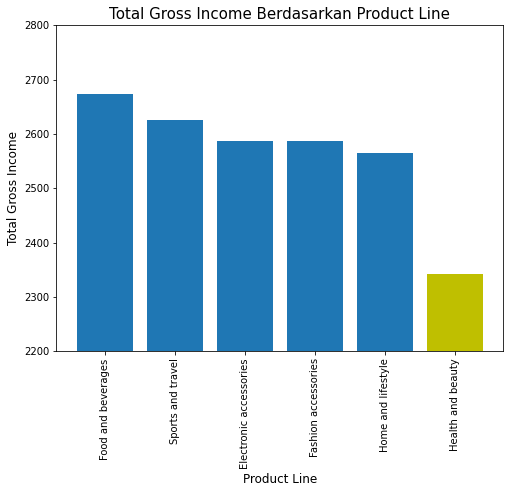

In [14]:
plt.figure(figsize=(8,6))
plt.bar(df[['Product line','gross income']].groupby('Product line').sum().sort_values('gross income',ascending=False).index,df[['Product line','gross income']] \
    .groupby('Product line').sum().sort_values('gross income',ascending=False)['gross income'],color=['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#1f77b4','y'])
plt.ylim(2200,2800)
plt.xticks(rotation=90)
plt.xlabel('Product Line',fontsize=12)
plt.ylabel('Total Gross Income',fontsize=12)
plt.title('Total Gross Income Berdasarkan Product Line',fontsize=15)
#ax.get_legend().remove()
plt.show()

Dari grafik terlihat kalau gross income dari product line Health and Beauty paling rendah. Pada product line ini bisa dilakukan marketing campaign untuk meningkatkan penjualan dan secara langsung gross income. 

### 5.2. Metode Pembayaran

Sekarang kita akan menentukan apakah ada metode pembayaran tertentu yang dapat kita sasar. Hitung jumlah masing-masing metode pembayaran, kemudian visualisasikan ke dalam pie chart.

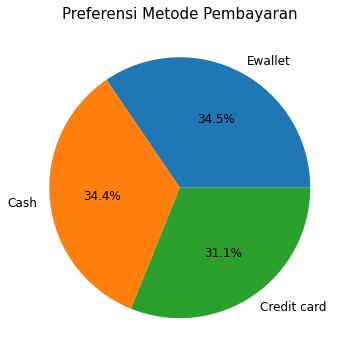

In [15]:
plt.figure(figsize=(8,6),facecolor='w')
plt.title('Preferensi Metode Pembayaran',fontsize=15)
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].value_counts().keys(),autopct='%1.1f%%', textprops={'fontsize':12}) #plot piechart dengan menunjukkan persentase dan label
plt.show()

Secara persentase, ketiga metode pembayaran hampir terbagi rata. Strategi marketing tidak perlu menyasar metode pembayaran tertentu kecuali ada faktor eksternal seperti diskon dari provider ewallet atau credit card.

### 5.3. Gross Income Kumulatif Cabang

Selanjutnya kita akan melihat di cabang mana kita akan melakukan marketing campaign ini berdasarkan gross income kumulatif selama tiga bulan.

Kelompokkan data berdasarkan kota, kemudian gabung menjadi satu dataframe dan hitung nilai kumulatif gross income. Setelah itu visualisasikan ke dalam area chart.

In [16]:
A_income = df[df['City']=='Yangon'][['Date','gross income']].groupby('Date').sum()
B_income = df[df['City']=='Mandalay'][['Date','gross income']].groupby('Date').sum()
C_income = df[df['City']=='Naypyitaw'][['Date','gross income']].groupby('Date').sum()

In [17]:
df_income = A_income.merge(B_income,how='outer',left_index=True,right_index=True)
df_income = df_income.merge(C_income,how='outer',left_index=True,right_index=True)
df_income.rename(columns={'gross income_x':'Yangon','gross income_y':'Mandalay','gross income':'Naypyitaw'},inplace=True)
df_income.fillna(method='pad',inplace=True)
df_income = np.cumsum(df_income)

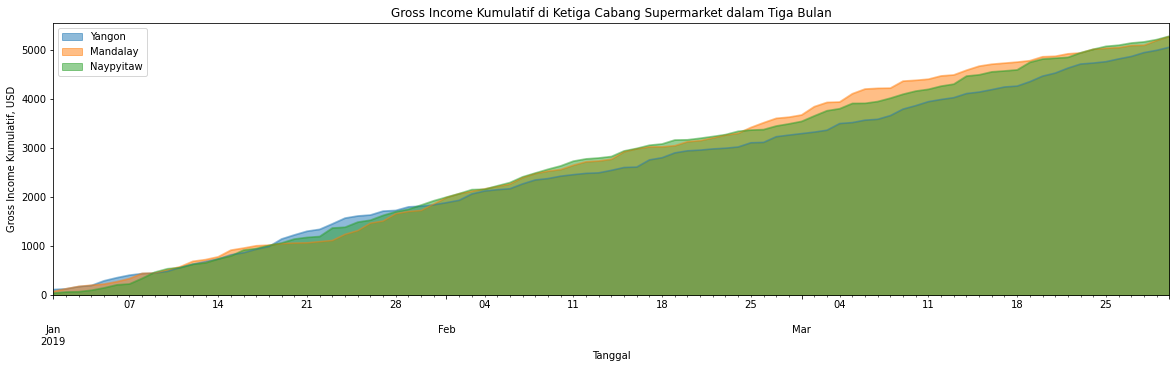

In [18]:
ax = df_income.plot(kind='area',stacked=False,figsize=(20,5),alpha=0.5)
ax.set_title('Gross Income Kumulatif di Ketiga Cabang Supermarket dalam Tiga Bulan')
ax.set_ylabel('Gross Income Kumulatif, USD')
ax.set_xlabel('Tanggal')
plt.show()

Marketing campaign bisa kita lakukan di ketiga cabang karena performa penjualannya tidak berbeda jauh.

### 5.4. Rata-Rata Jumlah Transaksi Harian dan Total Belanja Harian

Di tahap ini kita akan lihat kira-kira di hari apa agar banyak customer yang melihat marketing campaign ini.

In [19]:
days = ['Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu']
daily = pd.merge(pd.DataFrame(df[['Day','Invoice ID']].groupby('Day').count()), \
    pd.DataFrame(df[['Day','Total']].groupby('Day').sum()), left_index=True, right_index=True)
daily['Days'] = days
daily.set_index(daily['Days'],inplace=True)

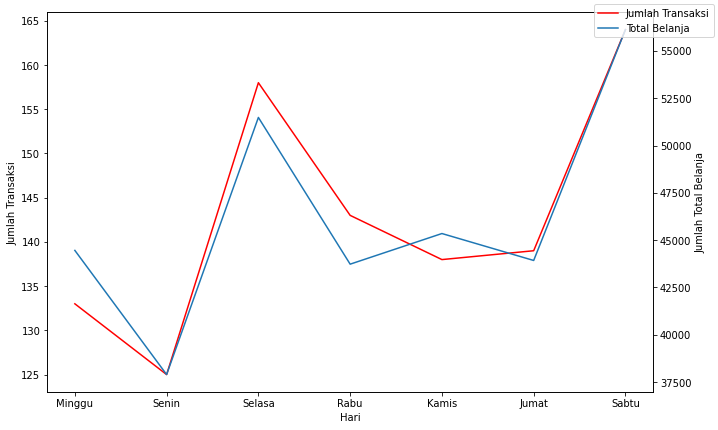

In [20]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel('Hari')
ax1.set_ylabel('Jumlah Transaksi')
ax1.plot(daily.index,daily['Invoice ID'],color='r',label='Jumlah Transaksi')
ax2 = ax1.twinx()
ax2.set_ylabel('Jumlah Total Belanja')
ax2.plot(daily.index,daily['Total'],label='Total Belanja')
fig.tight_layout()
fig.legend()
plt.show()

Kalau dilihat dari jumlah transaksi dan jumlah total belanja, puncak tertingginya berada di hari Sabtu, sedangkan terendahnya di hari Senin. Jika ingin ada campaign marketing, sebaiknya dilakukan pada hari Sabtu sebagai pilihan pertama atau Selasa.

### 5.5. Total Belanja Berdasarkan Tanggal

Selanjutnya kita akan melihat pada tanggal berapa sebaiknya kita lakukan marketing campaign. Apakah di awal bulan atau akhir bulan.

In [21]:
day = pd.merge(pd.DataFrame(df[['Day of the Month','Invoice ID']].groupby('Day of the Month').count()), \
    pd.DataFrame(df[['Day of the Month','Total']].groupby('Day of the Month').sum()), left_index=True, right_index=True)

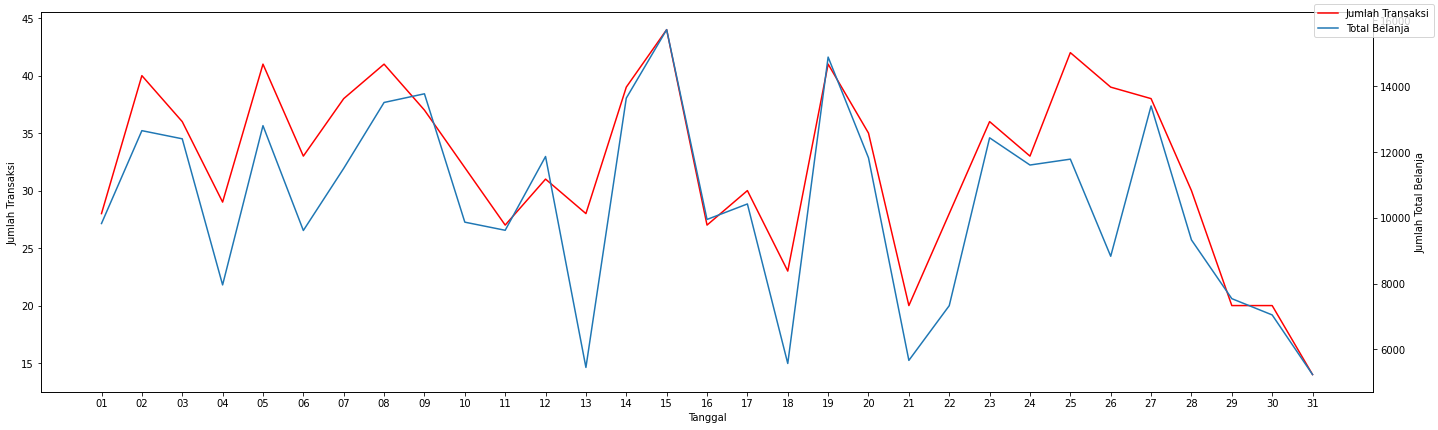

In [22]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Jumlah Transaksi')
ax1.plot(day.index,day['Invoice ID'],color='r',label='Jumlah Transaksi')
ax2 = ax1.twinx()
ax2.set_ylabel('Jumlah Total Belanja')
ax2.plot(day.index,day['Total'],label='Total Belanja')
fig.tight_layout()
fig.legend()
plt.show()

Kalau kita lihat, jumlah transaksi dan nilai total belanja cukup konsisten mulai dari tanggal 1 sampai dengan 8. Setelah itu mulai terjadi kenaikan dan penurunan fluktuatif dan di akhir bulan setelah tanggal 25 keduanya konsisten turun hingga tanggal 31. Berdasarkan data ini, sebaiknya marketing campaign dilakukan di awal bulan dari tanggal 1 sampai dengan 8.

Terakhir kita akan tentukan target marketing utama apakah member atau normal. Kita akan gunakan uji hipotesis pada bab-bab berikutnya.

## 6. Descriptive Statistics

### 6.1. Measure of Central Tendency

Selanjutnya kita akan melihat central tendency dari dataset yang kita miliki.

In [23]:
print('Central Tendency Member')
print('Mean: ', "{:.2f}".format(np.mean(df_member['Total'])), 'USD') #mean dalam dua desimal
print('Median: ', "{:.2f}".format(np.median(df_member['Total'])), 'USD') #median dalam dua desimal
print('Modus: ', "{:.2f}".format(df_member['Total'].mode()[0]), 'USD') #modus dalam dua desimal

Central Tendency Member
Mean:  327.79 USD
Median:  266.03 USD
Modus:  93.74 USD


In [24]:
print('Central Tendency Normal')
print('Mean: ', "{:.2f}".format(np.mean(df_normal['Total'])), 'USD') #mean dalam dua desimal
print('Median: ', "{:.2f}".format(np.median(df_normal['Total'])), 'USD') #median dalam dua desimal
print('Modus: ', "{:.2f}".format(df_normal['Total'].mode()[0]), 'USD') #modus dalam dua desimal

Central Tendency Normal
Mean:  318.12 USD
Median:  237.43 USD
Modus:  12.69 USD


Dari analisis statistik deskriptif kita temukan bahwa mean dan median keduanya hampir sama, tetapi modusnya berbeda. Untuk lebih detailnya kita perlu melihat distribusi datanya.

### 6.2. Measure of Variance

Di Bab 6.1 telah kita lihat bahwa central tendency dataset ini mirip. Sekarang kita akan cek rentang dataset untuk memastikan selisih nilai median dan maksimum serta selisih nilai minimum dan maksimum dari kedua dataset.

In [25]:
print('Range Dataset Member')
print('Nilai minimum: ', "{:.2f}".format((df_member['Total'].quantile(0))), 'USD') #min dalam dua desimal
print('Nilai Q1: ', "{:.2f}".format((df_member['Total'].quantile(0.25))), 'USD') #Q1 dalam dua desimal
print('Nilai Q2: ', "{:.2f}".format((df_member['Total'].quantile(0.5))), 'USD') #median dalam dua desimal
print('Nilai Q3: ', "{:.2f}".format((df_member['Total'].quantile(0.75))), 'USD') #Q3 dalam dua desimal
print('Nilai maksimum: ', "{:.2f}".format((df_member['Total'].quantile(1))), 'USD') #max dalam dua desimal
print('Range: ', "{:.2f}".format((df_member['Total'].quantile(1))-(df_normal['Total'].quantile(0))), 'USD') #range = max - min

Range Dataset Member
Nilai minimum:  10.68 USD
Nilai Q1:  118.25 USD
Nilai Q2:  266.03 USD
Nilai Q3:  485.57 USD
Nilai maksimum:  1042.65 USD
Range:  1029.96 USD


In [26]:
print('Range Dataset Normal')
print('Nilai minimum: ', "{:.2f}".format((df_normal['Total'].quantile(0))), 'USD') #min dalam dua desimal
print('Nilai Q1: ', "{:.2f}".format((df_normal['Total'].quantile(0.25))), 'USD') #Q1 dalam dua desimal
print('Nilai Q2: ', "{:.2f}".format((df_normal['Total'].quantile(0.5))), 'USD') #median dalam dua desimal
print('Nilai Q3: ', "{:.2f}".format((df_normal['Total'].quantile(0.75))), 'USD') #Q3 dalam dua desimal
print('Nilai maksimum: ', "{:.2f}".format((df_normal['Total'].quantile(1))), 'USD') #max dalam dua desimal
print('Range: ', "{:.2f}".format((df_normal['Total'].quantile(1))-(df_normal['Total'].quantile(0))), 'USD') #range = max - min

Range Dataset Normal
Nilai minimum:  12.69 USD
Nilai Q1:  129.23 USD
Nilai Q2:  237.43 USD
Nilai Q3:  462.61 USD
Nilai maksimum:  1039.29 USD
Range:  1026.60 USD


Kalau kita lihat keduanya memiliki distribusi data yang mirip. Sekarang coba kita cek boxplot kedua data ini agar mendapat gambaran lebih jelas.

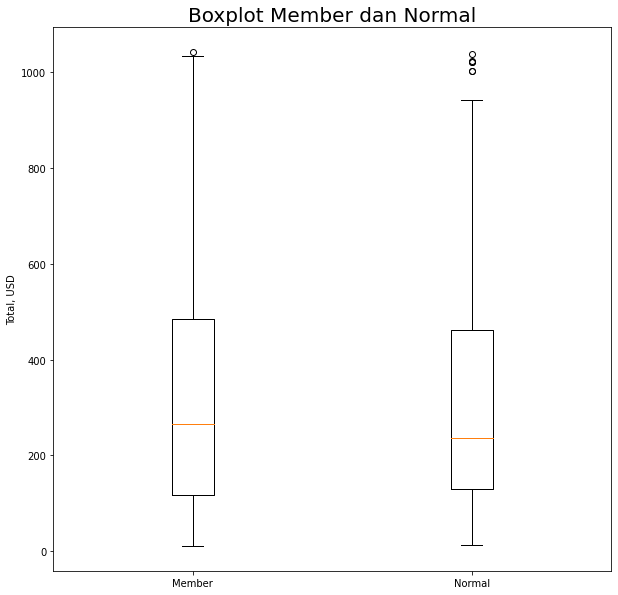

In [27]:
plt.figure(figsize=(10,10))
plt.boxplot([df_member['Total'],df_normal['Total']])
plt.ylabel("Total, USD")
plt.title("Boxplot Member dan Normal",fontsize=20)
plt.xticks([1,2],['Member','Normal'])
plt.show()

Dari boxplot kita berhasil mendeteksi outlier. Sekarang coba kita identifikasi batas atas dan bawah dari outlier menggunakan IQR dan Z-score.

### 6.3. IQR

Cek outlier menggunakan IQR. Outlier didefinisikan dengan Q3 + 3 x IQR sebagai upper limit atau Q1 - 3 x IQR sebagai lower limit.

In [28]:
#deklarasi quartil
Q1 = df_member['Total'].quantile(0.25)
Q3 = df_member['Total'].quantile(0.75)
IQR = Q3 - Q1

#deklarasi batas bawah dan batas atas data menggunakan IQR
lower_limit_member = Q1 - 1.5 * IQR
upper_limit_member = Q3 + 1.5 * IQR
lower_limit_member, upper_limit_member

(-432.73125000000005, 1036.55475)

In [29]:
#deklarasi quartil
Q1 = df_normal['Total'].quantile(0.25)
Q3 = df_normal['Total'].quantile(0.75)
IQR = Q3 - Q1

#deklarasi batas bawah dan batas atas data menggunakan IQR
lower_limit_normal = Q1 - 1.5 * IQR
upper_limit_normal = Q3 + 1.5 * IQR
lower_limit_normal, upper_limit_normal

(-370.8285, 962.6714999999999)

Pada kedua dataset kita temukan bahwa nilai maksimum dan mungkin beberapa data point lain ada di atas upper limit. Dataset ini nanti akan kita filter setelah pengecekan dengan Z-score.

### 6.4. Z-Score

In [30]:
stats.zscore(df_member['Total']).aggregate(['max','min'])

max    2.885448
min   -1.279991
Name: Total, dtype: float64

In [31]:
stats.zscore(df_normal['Total']).aggregate(['max','min'])

max    2.959748
min   -1.253511
Name: Total, dtype: float64

Dari Z-score, tidak ada data yang perlu di-filter karena masih dalam rentang -3 sampai dengan 3.

### 6.5. Filtering Outlier

In [32]:
#filter data member
df_member = df_member[df_member['Total']<upper_limit_member]
df_member = df_member[df_member['Total']>lower_limit_member]

#filter data normal
df_normal = df_normal[df_normal['Total']<upper_limit_normal]
df_normal = df_normal[df_normal['Total']>lower_limit_normal]

Kita visualisasikan kembali menggunakan boxplot.

In [33]:
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Total,Date,Time,Payment,gross income,Rating,Day,Day Name,Day of the Month
0,765-26-6951,Yangon,Normal,Male,Sports and travel,457.443,2019-01-01,10:39,Credit card,21.783,6.9,2,Tue,01
1,746-04-1077,Mandalay,Member,Female,Food and beverages,888.615,2019-01-01,11:36,Credit card,42.315,9.0,2,Tue,01
2,271-77-8740,Naypyitaw,Member,Female,Sports and travel,184.086,2019-01-01,11:40,Ewallet,8.766,5.0,2,Tue,01
3,133-14-7229,Naypyitaw,Normal,Male,Health and beauty,132.027,2019-01-01,11:43,Cash,6.287,5.0,2,Tue,01
4,651-88-7328,Yangon,Normal,Female,Fashion accessories,621.243,2019-01-01,13:55,Cash,29.583,7.7,2,Tue,01


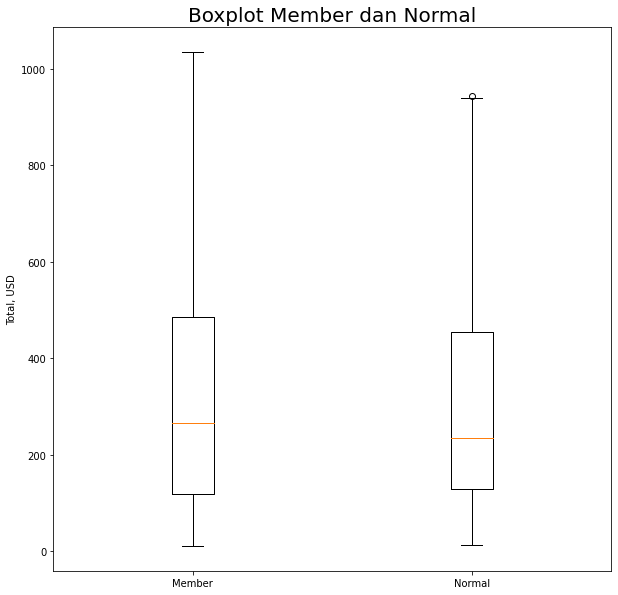

In [34]:
plt.figure(figsize=(10,10))
plt.boxplot([df_member['Total'],df_normal['Total']])
plt.title("Boxplot Member dan Normal",fontsize=20)
plt.ylabel("Total, USD")
plt.xticks([1,2],['Member','Normal'])
plt.show()

Pada dataset member tidak terdeteksi outlier, tetapi pada dataset normal masih ada. Kita akan biarkan outlier ini.

### 6.5. Distribusi Data

Sekarang kita coba visualisasikan dengan histogram.

Skewness:  0.8310091330211646
Kurtosis:  -0.23712027979720585


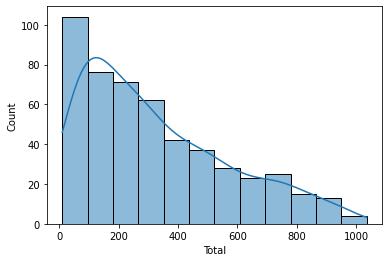

In [35]:
sns.histplot(df_member['Total'],kde=True)
print('Skewness: ',df_member['Total'].skew())
print('Kurtosis: ',df_member['Total'].kurt())

Skewness:  0.879897237277784
Kurtosis:  -0.15023374310482218


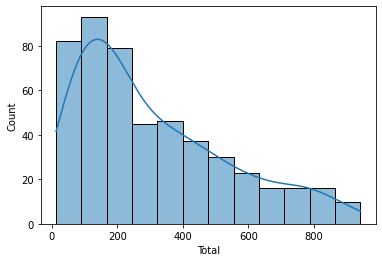

In [36]:
sns.histplot(df_normal['Total'],kde=True)
print('Skewness: ',df_normal['Total'].skew())
print('Kurtosis: ',df_normal['Total'].kurt())

Kedua data memiliki positive skew dengan bentuk platikurtik.

## 7. Inferential Statistics

Sebelumnya kita sudah punya pertanyaan berikut:

Apakah target marketing untuk belanja di supermarket cukup tipe customer Member saja?

Pertanyaan tersebut dapat kita parafrase menjadi apakah rata-rata belanja tipe customer Member lebih besar dari tipe customer Normal? Ubah pertanyaan tersebut ke dalam H0 dan H1.
- **H0: μMember <= μNormal**
- **H1: μMember > μNormal**

Pada dasarnya paired test digunakan untuk memastikan beda rata-rata kedua populasi atau sampel adalah 0 atau bukan. Untuk memudahkan definisi, maka hipotesis ditulis seperti di atas. Alternatif penulisannya adalah:

- **H0: (μMember -  μNormal) <= 0**
- **H1: (μMember -  μNormal) > 0**

Hitung jumlah data di kedua dataset terlebih dahulu.

In [37]:
(df_member['Total']).count(), (df_normal['Total']).count()

(500, 493)

Kita akan ambil 490 data point dan lakukan paired t-test one tailed dengan hipotesis alternatif 'greater'.

In [38]:
t_stat,p_val = stats.ttest_rel((df_member['Total']).sample(490),(df_normal['Total']).sample(490),alternative='greater')
print('P-value:',p_val)

P-value: 0.15537173601219248


Karena P-value lebih besar dari critical value, maka kita terima H0.

**Tidak terdapat cukup bukti untuk menolak H0.**

Secara statistik, selisih rata-rata belanja customer tipe Member dan Normal tidak signifikan. Sekarang coba kita visualisasikan dan hitung nilai rata-rata belanja kedua tipe customer.

In [39]:
#deklarasi populasi menggunakan mean dan stdev dari sampel
df_member_pop = np.random.normal((df_member['Total']).mean(), (df_member['Total']).std(), 10000)
df_normal_pop = np.random.normal((df_normal['Total']).mean(), (df_normal['Total']).std(), 10000) 

C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


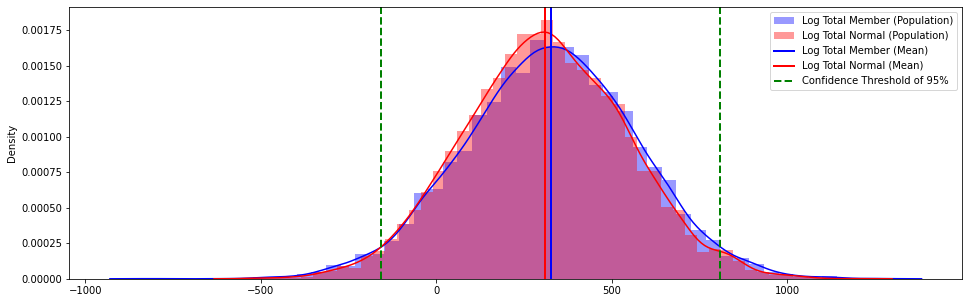

In [40]:
ci = stats.norm.interval(0.95, (df_member['Total']).mean(), (df_member['Total']).std()) #confidence interval 95% dengan critical value 0.05 atau 0.025 di dua sisi

plt.figure(figsize=(16,5))

sns.distplot(df_member_pop, label='Log Total Member (Population)', color='blue') #data populasi
sns.distplot(df_normal_pop, label='Log Total Normal (Population)', color='red') #data populasi

plt.axvline((df_member['Total']).mean(), color='blue', linewidth=2, label='Log Total Member (Mean)') #rata-rata sampel
plt.axvline((df_normal['Total']).mean(), color='red', linewidth=2, label='Log Total Normal (Mean)') #rata-rata sampel

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%') #garis batas confidence interval
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2) #garis batas confidence interval
plt.legend()

Kedua garis mean tersebut terlihat cukup berdekatan. Sekarang coba kita lihat berapa nilai keduanya.

In [41]:
print(f'Rata-rata belanja member adalah {df_member["Total"].mean():.0f} USD, sedangkan rata-rata belanja normal adalah {df_normal["Total"].mean():.0f} USD.')

Rata-rata belanja member adalah 326 USD, sedangkan rata-rata belanja normal adalah 310 USD.


Meskipun ada selisihnya sebesar 16 USD, nilai tersebut tidak signifikan secara statistik.

## 7. Conclusion

Berdasarkan analisis yang telah dilakukan, berikut kesimpulan yang didapat:
1. Product line yang akan ditingkatkan penjualannya adalah health and beauty
2. Tidak perlu menyasar metode pembayaran tertentu untuk marketing campaign ini
3. Tidak perlu menyasar cabang supermarket tertentu untuk marketing campaign ini
4. Marketing campaign sebaiknya dilakukan di hari Sabtu atau Selasa
5. Marketing campaign sebaiknya dilakukan di awal bulan dari tanggal 1 sampai dengan 8
6. Target customer pada marketing campaign ini adalah member dan normal